# Objetivos:
Temos o objetivo de desenvolver um algoritmo capaz de calcular a autocorrelação de uma sequência adquirida a partir de uma distribuição gaussiana normal de probabilidades. Para tanto usaremos o método :

```
numpy.random.rand()
```



In [0]:
import numpy as np


# Geração de Sequências

Apesar de querermos, teoricamente, uma sequência de NL termos, computacionalmente é melhor termos uma matriz L por N.

Assim, criemos uma função gerador_sequencia que recebe como argumento os parâmetros L e N. Ela deve retornar uma matriz de L linhas e N colunas, completamente preenchida por termos randômicos (método *np.rand.randn()*). A cada linha da matriz resultado chamaremos sequência x_a[n], com subíndice *a* referente a linha da matriz em que se encontra:

In [0]:
def gerador_sequencia(parametro_l, parametro_n):
  return np.random.randn(parametro_l,parametro_n)

# Definição de Matrizes

A partir das sequências geradas, iremos definir as matrizes Rl[n,tau]. Considere a matriz de aproximações ~Rl[n,tau] NxN, onde a contagem das linhas se inicia em 0 e se relaciona com a variável tau e as colunas se iniciam em 1 e se relacionam com a variável n. Cada termo da matriz é definido através de xl[n]*xl[n+tau].

Deve-se perceber que, quando o índice da sequência xl[.] ultrapassa o tamanho da sequência (o que começa a ocorrer em n = N+1), o termo correspondente da matriz é zerado.

Vale saber que passa-se as linhas da matriz sequencia. Assim, como iremos receber sempre uma vetor linha, precisamos sempre passar vetor_sequencia.shape[1]. Logo, usarei a linha:
> `matriz_apr_R[tau, n] = vetor_sequencia[n]*vetor_sequencia[n+tau]`


In [0]:
def gerar_matriz_RL(vetor_sequencia):
  matriz_apr_R = np.zeros([vetor_sequencia.shape[0],vetor_sequencia.shape[0]]) # recebo as colunas da matriz em forma de uma tupla
  for tau in range(0,vetor_sequencia.shape[0]): # sempre pegar as colunas!
    for n in range(0,vetor_sequencia.shape[0]): # sempre pegar as colunas!
      if n+1+tau <= matriz_apr_R.shape[0]:
        matriz_apr_R[tau, n] = vetor_sequencia[n]*vetor_sequencia[n+tau]  
  return matriz_apr_R

# Código de geração de todas as matrizes:
Pro código a seguir, a variável `matriz_de_sequencias` se refere à matriz gerada pela função `gerador_sequencia()`

In [0]:
def gerar_matrizes(matriz_de_sequencias):
  lista_de_matrizes = [] #inicia como uma lista nula
  for iterador in range(0 , matriz_de_sequencias.shape[0]): 
    variavel_matriz_temporaria = gerar_matriz_RL(matriz_de_sequencias[iterador,:])
    lista_de_matrizes.append(variavel_matriz_temporaria)
  return lista_de_matrizes

# Gerador da matriz final multiplicada por L

Através do código abaixo podemos somar todas as matrizes geradas, ainda sem dividi-las por L.

In [0]:
def media_matricial(lista_de_matrizes):
  matriz_R = np.zeros(lista_de_matrizes[0].shape)
  for tau in range(0,lista_de_matrizes[0][0].shape[0]): # sempre pegar as colunas!
    for n in range(0,lista_de_matrizes[0][0].shape[0]): # sempre pegar as colunas!
      for k in range(len(lista_de_matrizes)):
        if n+1+tau <= matriz_R.shape[0]:
          matriz_R[tau,n] = matriz_R[tau,n] + lista_de_matrizes[k][tau][n]
  return matriz_R

# Função de plotagem do gráfico

Abaixo encontra-se um função que recebe a matriz a ser plotada (variável `resultado`) e plota o gráfico. 

In [0]:
def my_plot(resultado):
  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt
  from matplotlib import cm
  from matplotlib.ticker import LinearLocator, FormatStrFormatter
  
  fig = plt.figure()
  ax = fig.gca(projection='3d')

  n_cordinate = np.linspace(resultado.shape[0],1,resultado.shape[0]) # y coordinate
  tau_cordinate = np.linspace(0,resultado.shape[0]-1,resultado.shape[0]) # x coordinate
  xc, yc = np.meshgrid(tau_cordinate,n_cordinate)

  surf = ax.plot_surface(xc, yc, resultado, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
  # Customize the z axis.
  ax.set_zlim(np.amin(resultado), np.amax(resultado))
  
  # Customize title.
  plt.title('Autocorrelação') #adicionando o título
  
  # Customize X and Y axis.
  plt.xlabel('tau')
  plt.ylabel('n')

  

  #Print graph
  plt.show()
  

# Definição dos vetores N e L

In [0]:
L_list, N_list = [50, 500, 5000], [10, 50, 100]

# Automatização do código e plotagem de todos os gráficos:

Para o funcionamento correto do nosso algoritmo, a chamada das funções deve ser feita como se segue:


```
>variavel_l, variavel_n = .,.
>a = gerador_sequencia(l,n)
>b = gerar_matrizes(a)
>c = media_matricial(b)
>d = np.multiply(1/variavel_l,d)
>my_plot(np.multiply(1/l,c))
```



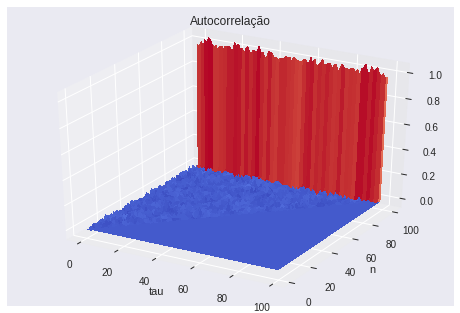

In [0]:
variavel_l, variavel_n = 5000,100
a = gerador_sequencia(variavel_l,variavel_n)
b = gerar_matrizes(a)
c = media_matricial(b)
d = np.multiply(1/variavel_l,c)
my_plot(d)

In [0]:
'''
from google.colab import files

with open('example.txt', 'w') as f:
  f.write(str(d))

files.download('example.txt')

'''
# codigo de download dos dados d

In [0]:
import pandas as pd
pd.DataFrame(np.multiply(1/variavel_l,c)).to_csv

<bound method DataFrame.to_csv of           0         1         2         3         4         5         6  \
0  0.809168  0.756100  0.937665  1.088292  1.073669  0.793526  0.930787   
1 -0.039184  0.091680  0.151355 -0.322206 -0.048945  0.104301 -0.023377   
2  0.028500 -0.141416  0.070716  0.134139  0.103356  0.065846  0.058482   
3 -0.024896  0.016035  0.077115  0.088514  0.020896  0.061192 -0.147415   
4  0.188156 -0.029598  0.150897  0.133741 -0.019345 -0.159753  0.000000   
5  0.100365  0.177771  0.122042 -0.086277 -0.111068  0.000000  0.000000   
6 -0.204209  0.156268 -0.017284 -0.149311  0.000000  0.000000  0.000000   
7  0.175726  0.034933 -0.074103  0.000000  0.000000  0.000000  0.000000   
8  0.097175 -0.062876  0.000000  0.000000  0.000000  0.000000  0.000000   
9 -0.178197  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9  
0  1.058514  1.021983  0.885491  
1  0.082555  0.026335  0.000000  
2  0.005960  0.000000  0.000000  
3  0